# Decision Trees Machine Learning Project

โครงการนี้เป็นการสำรวจและสร้างแบบจำลอง Decision Trees โดยใช้ข้อมูลจากโลกจริง เราจะใช้ชุดข้อมูล Titanic เพื่อทำนายการรอดชีวิต ทำการวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis) จัดการและเตรียมข้อมูล (Preprocessing) และวิเคราะห์ผลลัพธ์ของแบบจำลอง

## Introduction

Decision Trees เป็นอัลกอริทึมการเรียนรู้ของเครื่อง (Machine Learning Algorithm) ที่ได้รับความนิยม ใช้ในการทำงานทั้งแบบ การจำแนกประเภท (Classification) และ การถดถอย (Regression) โดยหลักการทำงานคือการแบ่งชุดข้อมูลออกเป็นส่วนย่อย ๆ อย่างต่อเนื่องตามค่าของคุณลักษณะ (Feature Values) ความเรียบง่ายและความสามารถในการตีความได้ของ Decision Trees ทำให้มันเป็นเครื่องมือที่มีคุณค่าสำหรับการทำความเข้าใจรูปแบบของข้อมูลและการสร้างแบบจำลองเพื่อการพยากรณ์ผลลัพธ์

วัตถุประสงค์ของโครงการนี้:

ทำความเข้าใจกลไกของ Decision Trees รวมถึงแนวคิดเรื่อง Entropy, Information Gain, และ Gini Impurity

วิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis) เพื่อค้นหารูปแบบที่ซ่อนอยู่ในข้อมูล

จัดเตรียมและประมวลผลข้อมูล (Preprocessing) เพื่อใช้ในการสร้างแบบจำลองการเรียนรู้ของเครื่อง

ฝึกและประเมินประสิทธิภาพของแบบจำลอง Decision Tree Classifier โดยใช้ข้อมูลจากโลกจริง

สร้างการแสดงผลเชิงภาพของเส้นทางการตัดสินใจ (Decision Path) และทำความเข้าใจความสำคัญของแต่ละคุณลักษณะ (Feature Importances)

In [30]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
# Ignore all warning messages that would normally be displayed
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Set plot style
sns.set(style='whitegrid')
# Display plots inline
%matplotlib inline

## Dataset Description

ชุดข้อมูลที่ใช้ในโครงการนี้คือ Titanic Dataset ซึ่งประกอบด้วยข้อมูลรายละเอียดของผู้โดยสารบนเรือไททานิก โดยมีคุณลักษณะสำคัญดังนี้:

pclass: ชั้นของผู้โดยสาร (1st, 2nd, 3rd) แสดงถึงสถานะทางสังคมและเศรษฐกิจ

sex: เพศของผู้โดยสาร

age: อายุของผู้โดยสาร

sibsp: จำนวนพี่น้องหรือคู่สมรสที่อยู่บนเรือ

parch: จำนวนบิดามารดาหรือบุตรที่อยู่บนเรือ

fare: ราคาค่าโดยสารที่ผู้โดยสารจ่าย

embarked: ท่าเรือที่ผู้โดยสารขึ้นเรือ (C = Cherbourg; Q = Queenstown; S = Southampton)

ตัวแปรเป้าหมาย (Target Variable) คือ survived ซึ่งบ่งบอกว่าผู้โดยสาร รอดชีวิต (1) หรือ ไม่รอดชีวิต (0)

ชุดข้อมูลนี้ให้ข้อมูลเชิงลึกที่มีคุณค่าเกี่ยวกับลักษณะประชากรและปัจจัยต่าง ๆ ที่อาจมีผลต่อการรอดชีวิต ทำให้เป็นกรณีศึกษาที่ยอดเยี่ยมสำหรับการประยุกต์ใช้อัลกอริทึม Decision Trees เพื่อจำแนกผลลัพธ์ของผู้โดยสาร

In [33]:
# Load the Titanic dataset from seaborn
import pandas as pd

# ไม่ต้องใช้ sns.load_dataset()
titanic = pd.read_csv("titanic.csv")   # ไฟล์อยู่โฟลเดอร์เดียวกับโน้ตบุ๊ก

In [34]:
# Display the first few rows of the raw dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop useless columns
titanic_clean = titanic.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Fill missing values
titanic_clean["Age"] = titanic_clean["Age"].fillna(titanic_clean["Age"].mean())
titanic_clean["Embarked"] = titanic_clean["Embarked"].fillna(
    titanic_clean["Embarked"].mode()[0]
)

# Encode categorical features (Sex, Embarked)
titanic_encoded = titanic_clean.copy()
titanic_encoded = pd.get_dummies(titanic_encoded, columns=["Sex", "Embarked"])

# Separate features and label
X = titanic_encoded.drop(columns=["Survived"])
y = titanic_encoded["Survived"]

# Train / validation split (80 / 20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_val.shape


In [35]:
# Basic information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

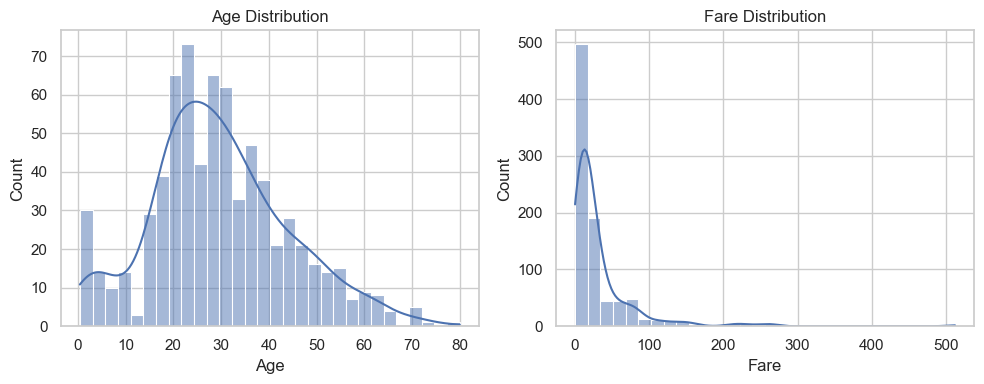

In [37]:
# Visualizing the distribution of continuous features
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(titanic['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

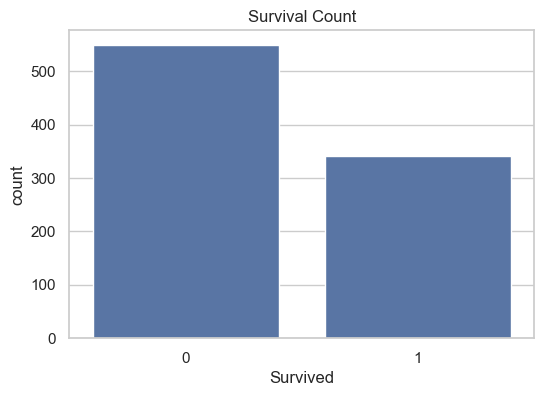

In [38]:
# Count plot for survival
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.show()

## Data Preprocessing

การประมวลผลข้อมูลเบื้องต้น (Data Preprocessing)
ในส่วนนี้ เราจะทำการประมวลผลข้อมูลเบื้องต้นเพื่อเตรียมความพร้อมสำหรับการสร้างแบบจำลอง ซึ่งกระบวนการนี้ประกอบด้วยการจัดการค่าที่หายไป (Missing Values), การเข้ารหัสตัวแปรเชิงหมวดหมู่ (Encoding Categorical Variables) และการแบ่งข้อมูลออกเป็นชุดฝึก (Training Set) และชุดทดสอบ (Testing Set)

สำหรับโครงการนี้ เราจะมุ่งเน้นไปที่คุณลักษณะ (Features) ต่อไปนี้:

pclass

sex

age

sibsp

parch

fare

embarked

ตัวแปรเป้าหมาย (Target Variable) คือ ‘survived’

In [41]:
# Select a subset of columns for the model
columns_to_use = ['Survived', 'Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']
data = titanic[columns_to_use].copy()

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing ages with median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Fill missing embarked with mode (most frequent value)

# Convert categorical features into dummy/indicator variables
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the preprocessed data
data_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [42]:
# Define feature matrix X and target vector y
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)

Training set size: (623, 8)
Testing set size: (268, 8)


## Mathematical Explanation of Decision Trees

Decision Trees ทำการจำแนกข้อมูลโดยการแบ่งชุดข้อมูลออกตามค่าของคุณลักษณะ (Feature Values) เพื่อสร้างกิ่งก้าน (Branches) จนกระทั่งไปถึงจุดตัดสินใจสุดท้ายหรือโหนดใบ (Leaf Node) แนวคิดสำคัญที่เกี่ยวข้องมีดังนี้:

Entropy (เอนโทรปี): เป็นการวัดความไม่แน่นอนหรือความไม่บริสุทธิ์ของข้อมูล คำนวณได้จากสมการ:

  $E = -Σ p(i) log₂ p(i)$

Information Gain (ค่าการได้รับข้อมูล): แสดงถึงการลดลงของค่าเอนโทรปีหลังจากที่ชุดข้อมูลถูกแบ่งตามคุณลักษณะใดคุณลักษณะหนึ่ง คำนวณได้จากสมการ:

  $Information Gain = Entropy(Parent) - Σ (weighted average) Entropy(Child)$

Gini Impurity (ความไม่บริสุทธิ์แบบจินี): เป็นอีกหนึ่งตัวชี้วัดความไม่บริสุทธิ์ของข้อมูล คำนวณได้จากสมการ:

  $Gini = 1 - Σ p(i)²$

การแบ่งโครงสร้างของต้นไม้ (Tree Splitting) จะเลือกคุณลักษณะและค่าขีดจำกัด (Threshold) ที่สามารถแยกข้อมูลได้ดีที่สุด เพื่อลดค่าความไม่บริสุทธิ์ของข้อมูลโดยใช้ค่า Entropy หรือ Gini Impurity เป็นเกณฑ์

In [50]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.746268656716418

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78       157
           1       0.70      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



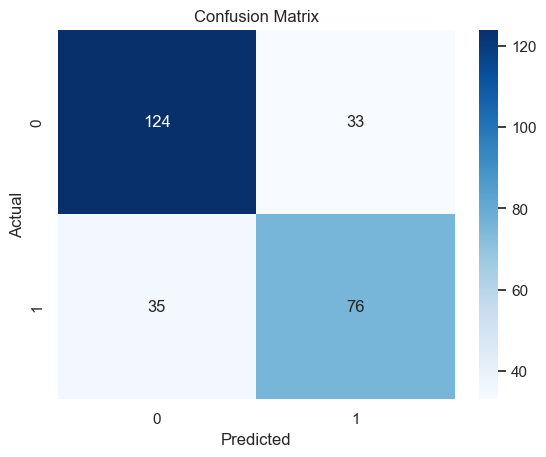

In [44]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [45]:
# Optional: Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Cross-Validation Accuracy:', grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8106193548387098


In [46]:
# Use the best estimator to predict on the test set
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print('\nAccuracy of Best Model:', accuracy_score(y_test, y_pred_best))
print('\nClassification Report (Best Model):\n', classification_report(y_test, y_pred_best))


Accuracy of Best Model: 0.8097014925373134

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



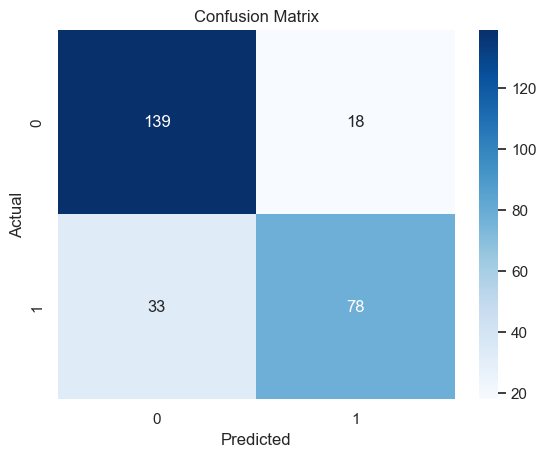

In [47]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

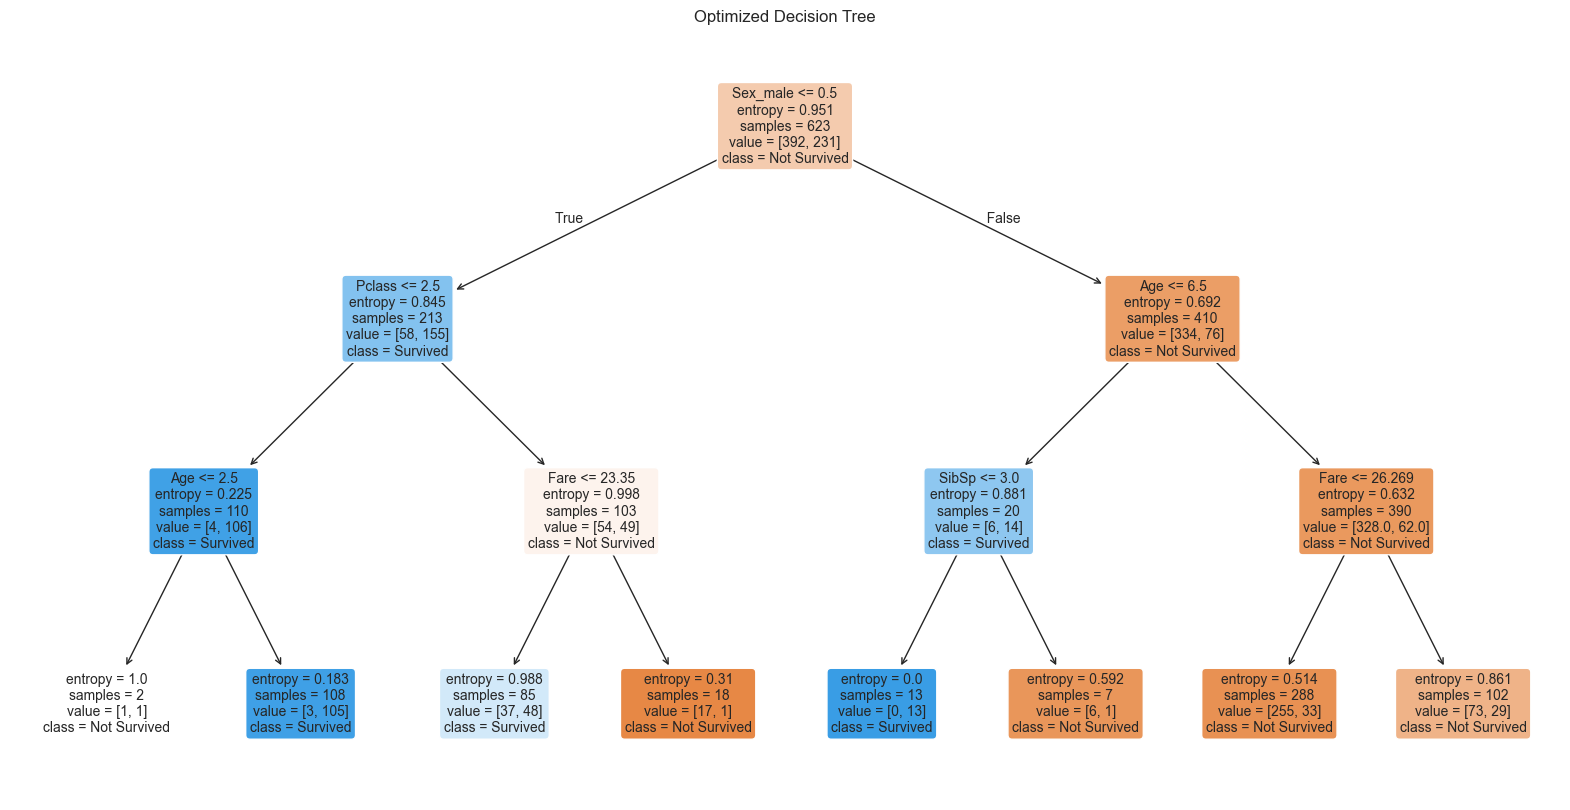

In [48]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=10)
plt.title('Optimized Decision Tree')
plt.show()

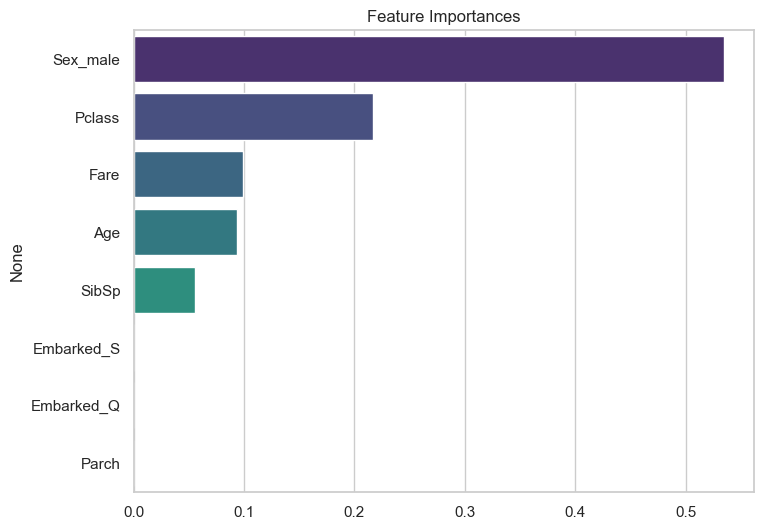

In [49]:
# Plot feature importances
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importances')
plt.show()

## Discussion

แบบจำลอง Decision Tree เป็นแนวทางที่เข้าใจง่ายในการจำแนกข้อมูล โดยข้อได้เปรียบหลักคือความสามารถในการตีความกฎการตัดสินใจได้อย่างชัดเจน

ข้อสังเกตสำคัญ:

แบบจำลองนี้ให้ความแม่นยำในระดับที่น่าพอใจ โดยรายงานการจำแนกผล (Classification Report) แสดงค่า Precision, Recall, และ F1-score ของแต่ละคลาส

การปรับค่าพารามิเตอร์ (Hyperparameter Tuning) ช่วยให้สามารถหาความซับซ้อนของต้นไม้ที่เหมาะสมที่สุด เพื่อสร้างสมดุลระหว่าง Underfitting และ Overfitting

การแสดงภาพความสำคัญของคุณลักษณะ (Feature Importance Visualization) ช่วยให้เข้าใจได้ว่าคุณลักษณะใดมีอิทธิพลต่อการทำนายการรอดชีวิตมากที่สุด

ข้อจำกัดที่อาจเกิดขึ้น:

แบบจำลอง Decision Tree มีแนวโน้มที่จะเกิด Overfitting ได้หากไม่ได้รับการตัดแต่ง (Pruning) หรือปรับพารามิเตอร์อย่างเหมาะสม

ประสิทธิภาพของแบบจำลองอาจปรับปรุงได้เพิ่มเติมโดยใช้วิธีแบบ Ensemble เช่น Random Forests หรือ Gradient Boosted Trees

แนวทางปรับปรุงในอนาคต:
อาจรวมถึงการสร้างคุณลักษณะขั้นสูง (Advanced Feature Engineering), การทดลองใช้อัลกอริทึมเพิ่มเติม และการประยุกต์ใช้เทคนิค Ensemble Methods เพื่อเพิ่มความแม่นยำและความทนทานของแบบจำลอง

## Conclusion

ในโครงการนี้ เราได้สร้างและใช้งานแบบจำลอง Decision Trees เพื่อทำนายการรอดชีวิตของผู้โดยสารเรือ Titanic ได้สำเร็จ โดยขั้นตอนที่ดำเนินการประกอบด้วย การโหลดข้อมูล (Data Loading), การประมวลผลเบื้องต้น (Preprocessing), การสำรวจข้อมูล (Exploration), การฝึกแบบจำลอง (Model Training), การปรับค่าพารามิเตอร์ (Hyperparameter Tuning) และการประเมินผล (Evaluation)

ด้วยการสร้างภาพแสดงโครงสร้างของต้นไม้ตัดสินใจ (Decision Tree Structure) และความสำคัญของคุณลักษณะ (Feature Importances) อย่างมีประสิทธิภาพ เราสามารถเข้าใจได้ว่าแบบจำลองตัดสินใจและทำนายผลลัพธ์ได้อย่างไร

โครงการนี้เน้นให้เห็นถึงความสำคัญของการเตรียมข้อมูล (Data Preprocessing), การปรับแบบจำลอง (Model Tuning) และการวิเคราะห์อย่างละเอียด ซึ่งเป็นปัจจัยสำคัญในการสร้างแบบจำลองการเรียนรู้ของเครื่อง (Machine Learning Models) ที่มีความแม่นยำและเชื่อถือได้

## References

- Seaborn Titanic dataset: https://github.com/mwaskom/seaborn-data
- Scikit-learn documentation: https://scikit-learn.org/stable/
- Decision Trees concepts: https://en.wikipedia.org/wiki/Decision_tree_learning